# **DS203 Project - Autumn 2022**

Ravi Kumar - 210010052

Shravya Suresh - 210260046

Saurabh Prajapati - 210010057

## **Dependency Analysis of Solar Flares and Prediction of Solar Activity**

### **Preliminaries**

Import libraries and store dataset into a pandas dataframe

In [1]:
#import libraries for EDA and ML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import statistics
import math
import warnings
warnings.filterwarnings("ignore")
from datetime import date
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from keras.losses import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas.plotting import scatter_matrix
from google.colab import drive

In [2]:
#mount google drive to access the data
drive.mount('drive')
#location for saving all plots
images_dir = '/content/drive/MyDrive/DS203/Plots'

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [3]:
#read the data into a pandas dataframe

df1 = pd.read_csv("/content/drive/MyDrive/DS203/hessi.solar.flare.UP_To_2018.csv")
df2 = pd.read_csv("/content/drive/MyDrive/DS203/hessi.solar.flare.2002to2016.csv")
df3 = pd.read_csv("/content/drive/MyDrive/DS203/KonusWIND_SolarFlares.csv", sep='\t')

In [4]:
df1

,flare,start.date,start.time,peak,end,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,flag.1,flag.2,flag.3,flag.4,flag.5
0,2021213,2002-02-12,21:29:56,21:33:38,21:41:48,712,136,167304.0,12-25,592,-358,692,0,A1,P1,NaN,NaN,NaN
1,2021228,2002-02-12,21:44:08,21:45:06,21:48:56,288,7,9504.0,6-12,604,-341,694,9811,A1,P1,PE,Q1,NaN
2,2021332,2002-02-13,00:53:24,00:54:54,00:57:00,216,15,11448.0,6-12,-310,375,487,9825,A1,P1,NaN,NaN,NaN
3,2021308,2002-02-13,04:22:52,04:23:50,04:26:56,244,20,17400.0,12-25,-277,378,469,9822,A1,P1,NaN,NaN,NaN
4,2021310,2002-02-13,07:03:52,07:05:14,07:07:48,236,336,313392.0,25-50,-272,390,476,9825,A1,GS,P1,PE,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116138,18020903,2018-02-09,16:41:28,16:42:54,16:43:32,124,18,2888.0,6-12,-345,-38,347,2699,A0,DF,P1,PE,Q2
116139,18020904,2018-02-09,18:15:56,18:17:26,18:17:40,104,16,1656.0,6-12,-268,-38,271,2699,A0,DF,P1,PE,Q2
116140,18021001,2018-02-10,13:04:36,13:06:46,13:07:04,148,15,2224.0,6-12,-115,-38,121,2699,A0,DF,P1,PE,Q2
116141,18022601,2018-02-26,15:49:56,15:51:18,15:53:52,236,16,3312.0,6-12,115,192,223,2700,A0,DF,P1,PE,Q2


In [5]:
df2

,flare,start.date,start.time,peak,end,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,flag.1,flag.2,flag.3,flag.4,flag.5
0,2021213,2002-02-12,21:29:56,21:33:38,21:41:48,712,136,167304,12-25,592,-358,692,0,A1,P1,NaN,NaN,NaN
1,2021228,2002-02-12,21:44:08,21:45:06,21:48:56,288,7,9504,6-12,604,-341,694,9811,A1,P1,PE,Q1,NaN
2,2021332,2002-02-13,00:53:24,00:54:54,00:57:00,216,15,11448,6-12,-310,375,487,9825,A1,P1,NaN,NaN,NaN
3,2021308,2002-02-13,04:22:52,04:23:50,04:26:56,244,20,17400,12-25,-277,378,469,9822,A1,P1,NaN,NaN,NaN
4,2021310,2002-02-13,07:03:52,07:05:14,07:07:48,236,336,313392,25-50,-272,390,476,9825,A1,GS,P1,PE,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113937,16122603,2016-12-26,22:09:20,22:17:02,22:17:24,484,152,75328,3-6,0,0,0,0,A0,GE,NS,PE,Q2
113938,16122604,2016-12-26,23:25:32,23:28:18,23:43:48,1096,304,142048,3-6,0,0,0,0,A0,DR,NS,PE,Q2
113939,16122701,2016-12-27,08:33:08,08:39:06,08:39:40,392,80,32344,3-6,0,0,0,0,A0,DF,NS,PE,Q3 SE
113940,16122702,2016-12-27,12:21:24,12:21:30,12:30:04,520,24,17336,6-12,326,326,461,0,A0,DF,DR,P1,PE Q3


In [6]:
df3

,#,TriggerDate,TriggerTime,TriggerTime.1,Class,GOESTbegin,GOESTmax,GOESTend
0,1,1994-12-14,05:38:45.226,20325.226,M2.5,05:35,05:41,05:45
1,2,1995-02-03,01:47:11.728,6431.728,M4.3,01:35,01:51,01:54
2,3,1995-02-04,15:42:24.557,56544.557,M2.6,15:36,15:44,15:49
3,4,1995-02-20,03:18:27.878,11907.878,M1.1,03:10,03:21,03:28
4,5,1995-03-29,06:47:45.958,24465.958,C1.6,06:44,06:49,06:51
...,...,...,...,...,...,...,...,...
999,1000,2022-10-11,08:40:42.110,31242.110,M3.9,08:36,08:42,08:46
1000,1001,2022-10-11,10:50:46.971,39046.971,M1.5,10:47,10:52,10:57
1001,1002,2022-10-12,14:17:50.268,51470.268,C8.8,14:14,14:18,14:22
1002,1003,2022-11-11,03:15:48.957,11748.957,C2.5,03:10,03:20,03:26


*The project will proceed with dataf1 since dataf2 is a subset of dataf1, along with dataf3*

Print the number of unique values in each column for dataf1

In [7]:
for c in df1.columns.values: # To handle each column of the dataset
  value_list = pd.unique(df1[c])  # Create a list of the unique values in the column 'c'
  print(c + ' has ' + str(len(value_list)) + ' unique values')
  if len(value_list) < 10: # If the column has less than 10 unique values, print them all
    uniq_list_str = '' # Defining string to store all unique values
    for i in range(0,len(value_list)):
      uniq_list_str = uniq_list_str + str(value_list[i]) + ', ' #Appending unique values
    print('These are: '+ uniq_list_str[0:len(uniq_list_str)-2]) # '-2' to omit the extra comma that is stored in the last iteration of the previous loop

flare has 116140 unique values
start.date has 4770 unique values
start.time has 21502 unique values
peak has 21495 unique values
end has 21522 unique values
duration.s has 895 unique values
peak.c/s has 1461 unique values
total.counts has 49201 unique values
energy.kev has 9 unique values
These are: 12-25, 6-12, 25-50, 3-6, 50-100, 100-300, 300-800, 7000-20000, 800-7000
x.pos.asec has 2094 unique values
y.pos.asec has 1783 unique values
radial has 1149 unique values
active.region.ar has 1978 unique values
flag.1 has 5 unique values
These are: A1, A0, a0, a1, A3
flag.2 has 16 unique values
flag.3 has 18 unique values
flag.4 has 20 unique values
flag.5 has 173 unique values


Print the number of unique values in each column for dataf3

In [8]:
for c in df3.columns.values: # To handle each column of the dataset
  value_list = pd.unique(df3[c])  # Create a list of the unique values in the column 'c'
  print(c + ' has ' + str(len(value_list)) + ' unique values')
  if len(value_list) < 10: # If the column has less than 10 unique values, print them all
    uniq_list_str = '' # Defining string to store all unique values
    for i in range(0,len(value_list)):
      uniq_list_str = uniq_list_str + str(value_list[i]) + ', ' #Appending unique values
    print('These are: '+ uniq_list_str[0:len(uniq_list_str)-2]) # '-2' to omit the extra comma that is stored in the last iteration of the previous loop

# has 1004 unique values
TriggerDate has 744 unique values
TriggerTime has 1004 unique values
TriggerTime.1 has 1004 unique values
Class has 214 unique values
GOESTbegin has 726 unique values
GOESTmax has 713 unique values
GOESTend has 729 unique values


Print the datatype of each column

In [9]:
df1.dtypes

flare                 int64
start.date           object
start.time           object
peak                 object
end                  object
duration.s            int64
peak.c/s              int64
total.counts        float64
energy.kev           object
x.pos.asec            int64
y.pos.asec            int64
radial                int64
active.region.ar      int64
flag.1               object
flag.2               object
flag.3               object
flag.4               object
flag.5               object
dtype: object

In [10]:
df3.dtypes

#                  int64
TriggerDate       object
TriggerTime       object
TriggerTime.1    float64
Class             object
GOESTbegin        object
GOESTmax          object
GOESTend          object
dtype: object

Print number of null values in each column

In [11]:
df1.isnull().sum()

flare                   0
start.date              0
start.time              0
peak                    0
end                     0
duration.s              0
peak.c/s                0
total.counts            0
energy.kev              0
x.pos.asec              0
y.pos.asec              0
radial                  0
active.region.ar        0
flag.1                  0
flag.2                  0
flag.3              19907
flag.4              20202
flag.5              61180
dtype: int64

In [12]:
df3.isnull().sum()

#                0
TriggerDate      0
TriggerTime      0
TriggerTime.1    0
Class            0
GOESTbegin       0
GOESTmax         0
GOESTend         0
dtype: int64

Print number of null values in each row

In [13]:
df1.isnull().sum(axis = 1)

0         3
1         1
2         3
3         3
4         0
         ..
116138    0
116139    0
116140    0
116141    0
116142    1
Length: 116143, dtype: int64

In [14]:
df3.isnull().sum(axis = 1)

0       0
1       0
2       0
3       0
4       0
       ..
999     0
1000    0
1001    0
1002    0
1003    0
Length: 1004, dtype: int64

### **Clean the data**

Identify the columns with excessive null values and drop them

In [15]:
del df1['flag.3']
del df1['flag.4']
del df1['flag.5']

In [16]:
df1

,flare,start.date,start.time,peak,end,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,flag.1,flag.2
0,2021213,2002-02-12,21:29:56,21:33:38,21:41:48,712,136,167304.0,12-25,592,-358,692,0,A1,P1
1,2021228,2002-02-12,21:44:08,21:45:06,21:48:56,288,7,9504.0,6-12,604,-341,694,9811,A1,P1
2,2021332,2002-02-13,00:53:24,00:54:54,00:57:00,216,15,11448.0,6-12,-310,375,487,9825,A1,P1
3,2021308,2002-02-13,04:22:52,04:23:50,04:26:56,244,20,17400.0,12-25,-277,378,469,9822,A1,P1
4,2021310,2002-02-13,07:03:52,07:05:14,07:07:48,236,336,313392.0,25-50,-272,390,476,9825,A1,GS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116138,18020903,2018-02-09,16:41:28,16:42:54,16:43:32,124,18,2888.0,6-12,-345,-38,347,2699,A0,DF
116139,18020904,2018-02-09,18:15:56,18:17:26,18:17:40,104,16,1656.0,6-12,-268,-38,271,2699,A0,DF
116140,18021001,2018-02-10,13:04:36,13:06:46,13:07:04,148,15,2224.0,6-12,-115,-38,121,2699,A0,DF
116141,18022601,2018-02-26,15:49:56,15:51:18,15:53:52,236,16,3312.0,6-12,115,192,223,2700,A0,DF


Rename columns for easier workability

In [17]:
df1.columns = ['flare',	'date',	'time',	'peak', 'end',	'duration',	'peakcs',	'counts', 'energykev', 'xposasec',	'yposasec','radial',	'activeregionar',	'flag1', 'flag2']

Changing some datatypes for easier workability

In [18]:
df3["TriggerDate"] = pd.to_datetime(df3.TriggerDate, format="%Y/%m/%d")
df1["date"] = pd.to_datetime(df1.date, format="%Y/%m/%d")

Split Dataset into Discrete and Continuous variables

In [19]:
#considering variables with less than 1000 unique values as discrete (for df1)

dis_col1 = [] #empty list to store names of discrete columns
cont_col1 = [] #empty list to store names of continuous columns

for c in df1.columns.values:
  if len(pd.unique(df1[c])) < 1000:   #if discrete variable
    dis_col1 = np.append(dis_col1, c)
  else:
    cont_col1 = np.append(cont_col1, c)

print('Discrete variables (df1): ', dis_col1)
print('Continuous variables (df1): ', cont_col1)

#considering variables with less than 300 unique values as discrete (for df3)

dis_col3 = [] #empty list to store names of discrete columns
cont_col3 = [] #empty list to store names of continuous columns

for c in df3.columns.values:
  if len(pd.unique(df3[c])) < 300:   #if discrete variable
    dis_col3 = np.append(dis_col3, c)
  else:
    cont_col3 = np.append(cont_col3, c)

print('Discrete variables (df3): ', dis_col3)
print('Continuous variables (df3): ', cont_col3)

Discrete variables (df1):  ['duration' 'energykev' 'flag1' 'flag2']
Continuous variables (df1):  ['flare' 'date' 'time' 'peak' 'end' 'peakcs' 'counts' 'xposasec'
 'yposasec' 'radial' 'activeregionar']
Discrete variables (df3):  ['Class']
Continuous variables (df3):  ['#' 'TriggerDate' 'TriggerTime' 'TriggerTime.1' 'GOESTbegin' 'GOESTmax'
 'GOESTend']


### **Perform EDA on the pre-processed data**

Plot Histogram for discrete variables

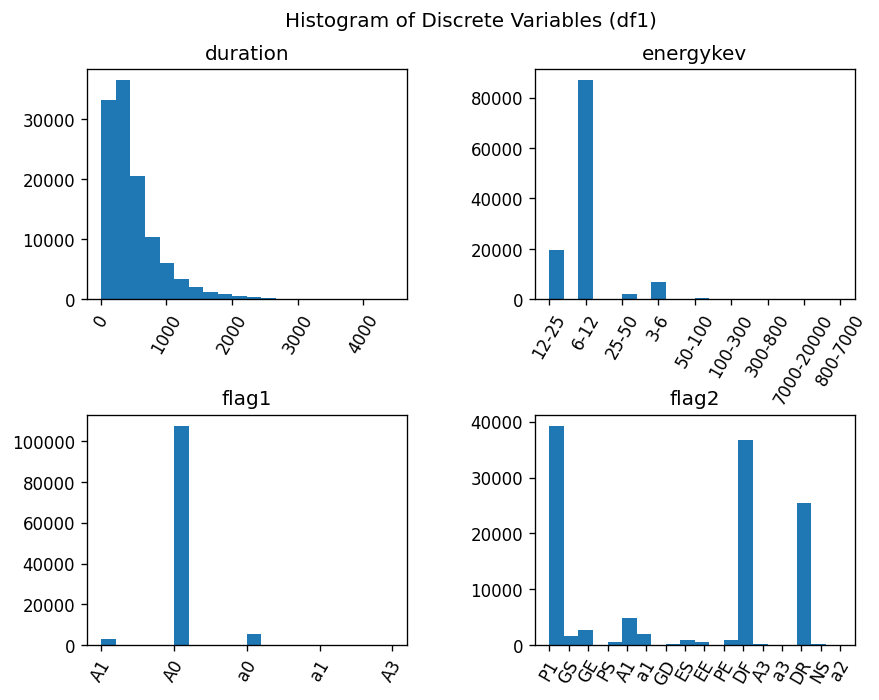

In [20]:
plt.figure(figsize=(8,6), dpi=120)
plt.suptitle("Histogram of Discrete Variables (df1)")
for i in range(len(dis_col1)):
  plt.subplot(2,2,i+1)
  plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.5)
  plt.hist(df1[str(dis_col1[i])], bins=20)
  plt.xticks(fontsize=10, rotation=60)
  plt.title(str(dis_col1[i]))
#plt.savefig(f"{images_dir}/hist_discrete_var.png")
plt.show()

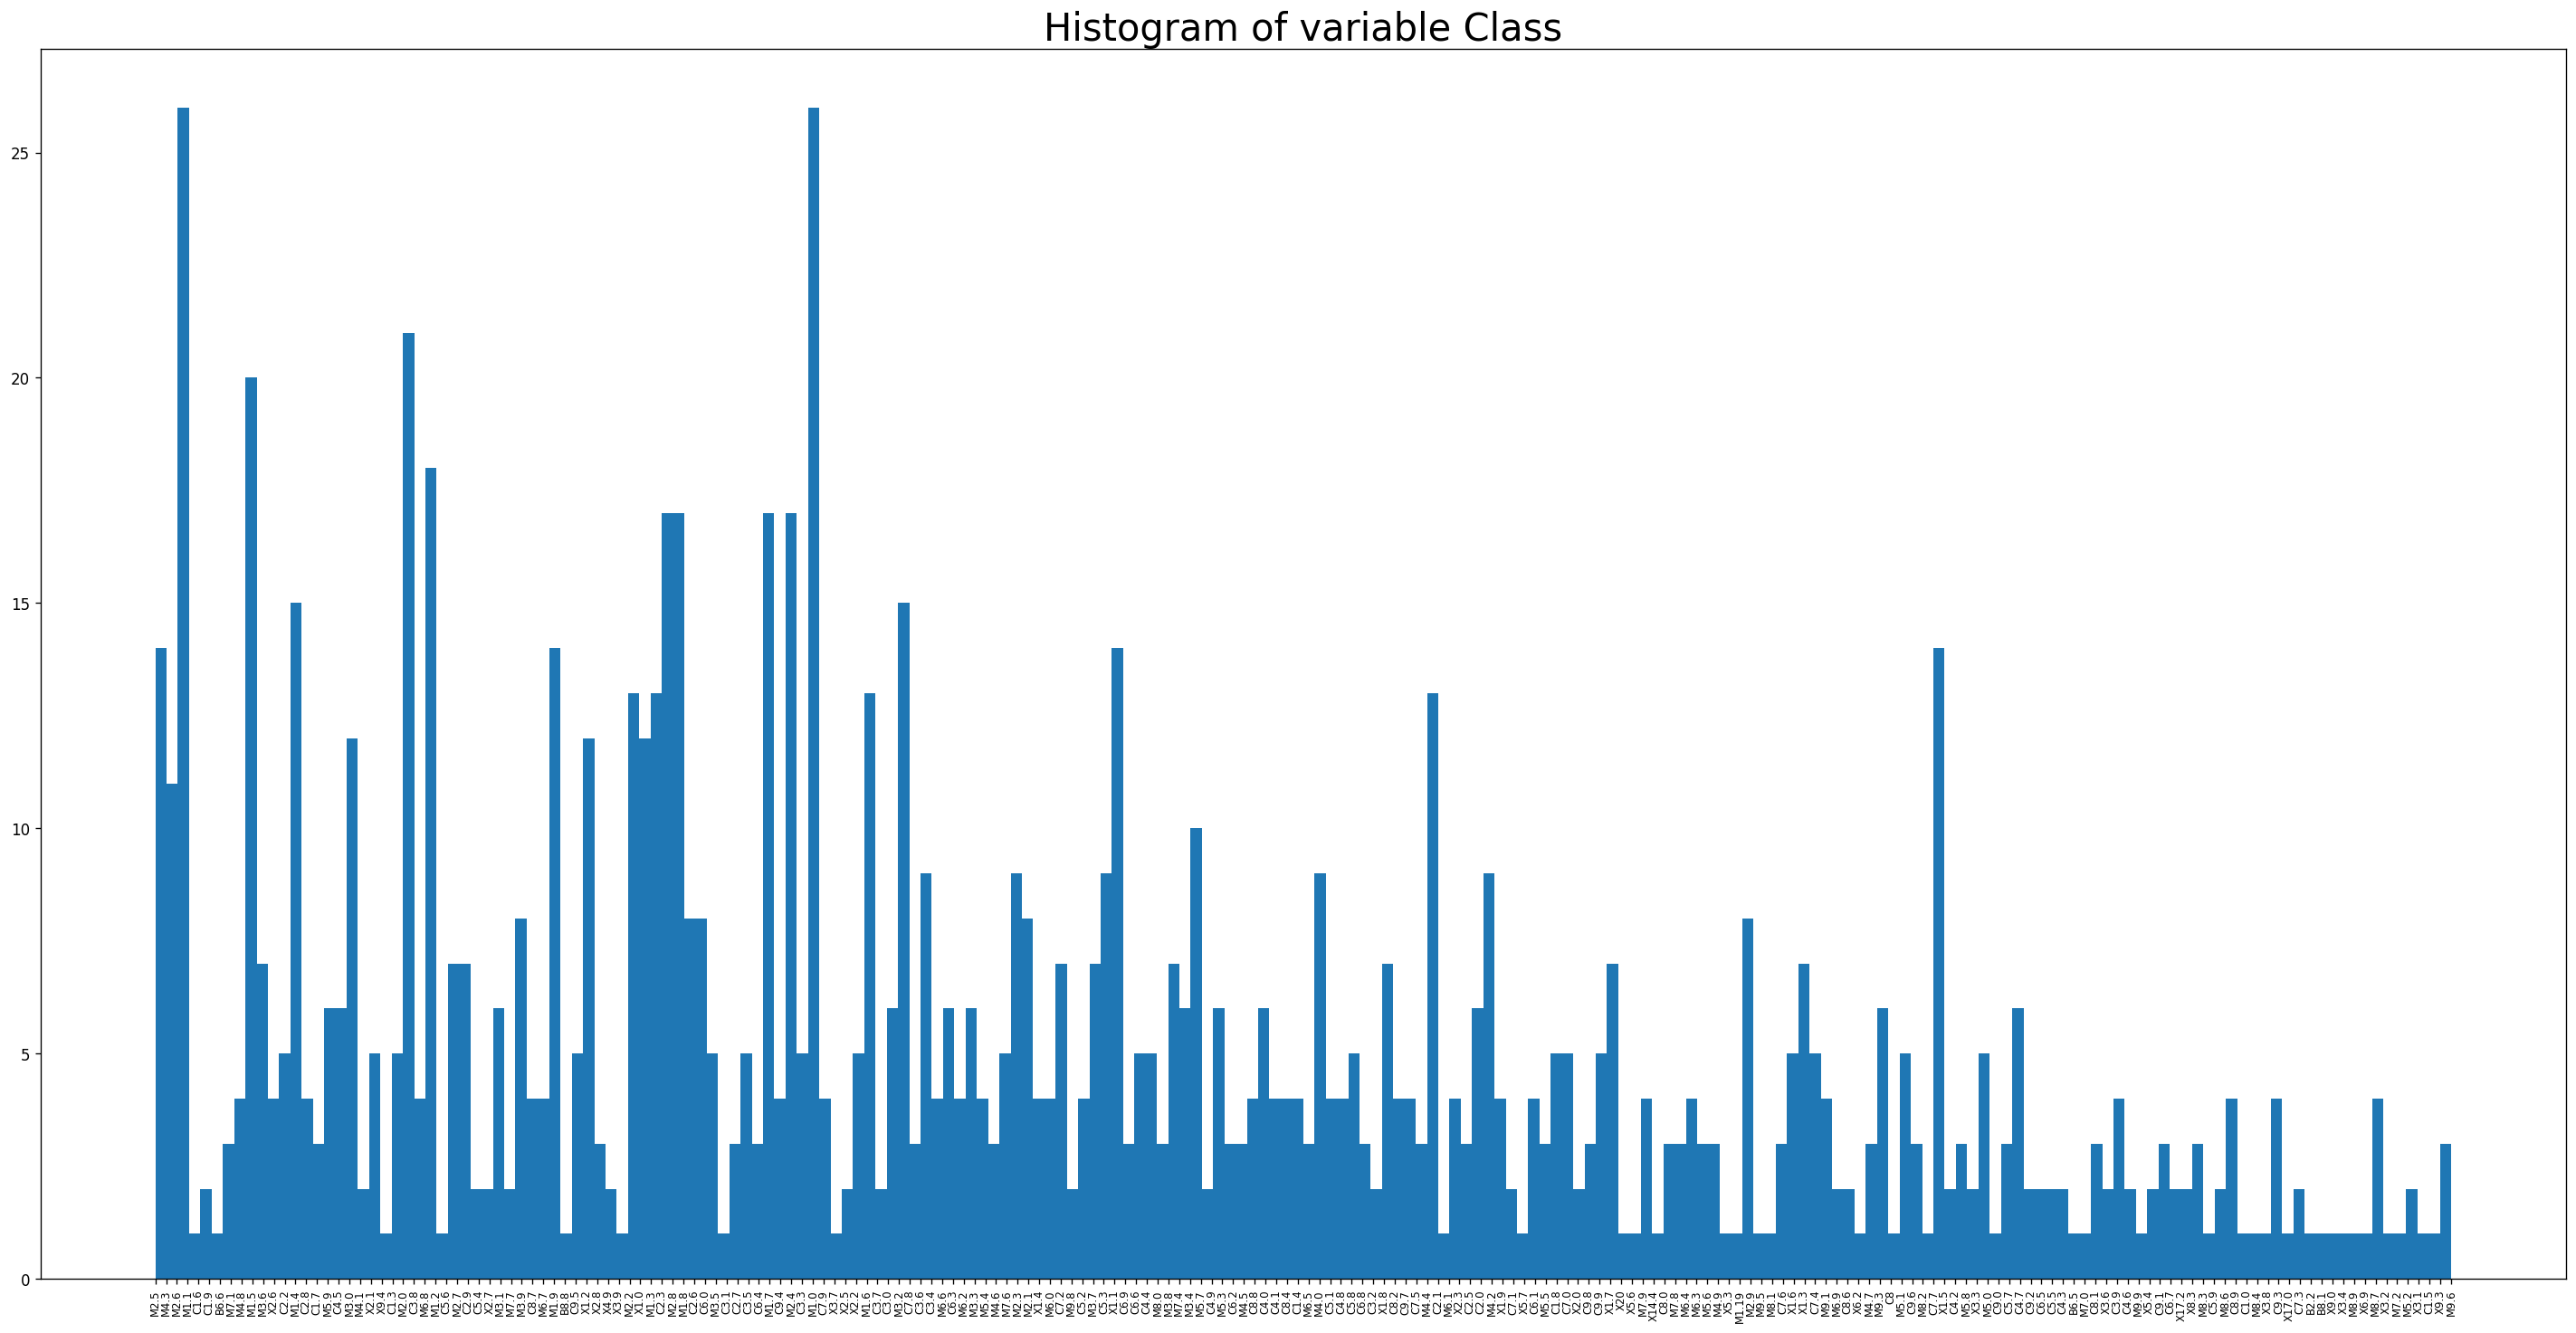

In [21]:
plt.figure(figsize=(30,15), dpi=120)
plt.hist(df3[str(dis_col3[0])], bins=204)
plt.xticks(fontsize=7, rotation=90)
plt.title("Histogram of variable "+str(dis_col3[0]), fontsize=25)
#plt.savefig(f"{images_dir}/hist_class.png")
plt.show()

Scatter and Correlation Matrices

*We cannot get a useful scatter plot or correlation heatmap for df3 as majority of variables are of object type*

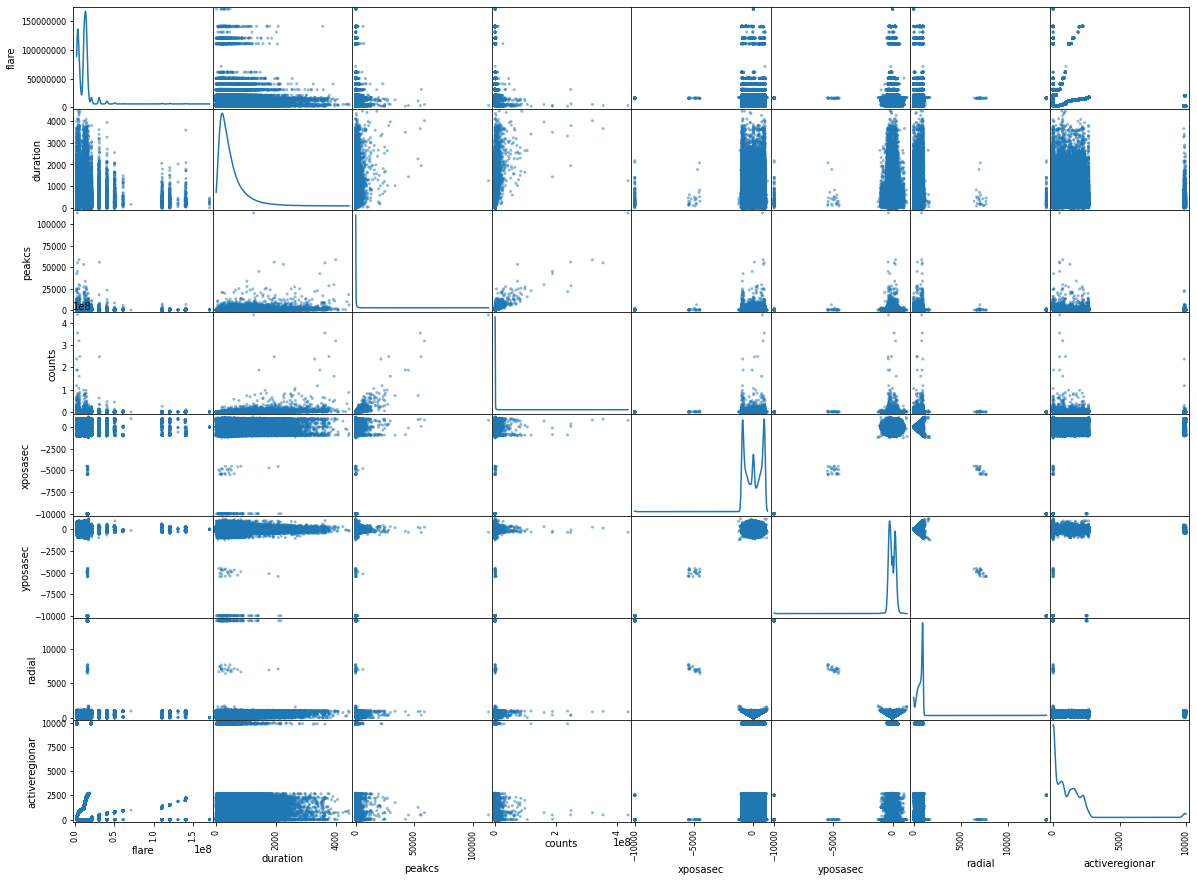

In [22]:
scatter_matrix(df1, alpha=0.5, figsize=(20,15), diagonal='kde')  #kde is kernel density estimation
#plt.savefig(f"{images_dir}/scatter_plot.png")
plt.show()

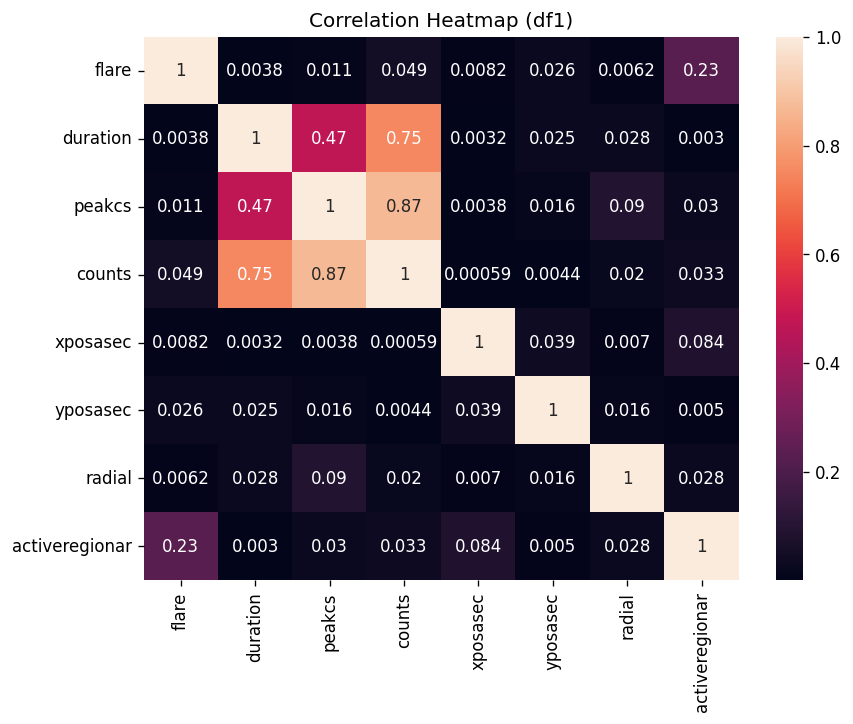

In [23]:
correlation_M = df1.corr(method='spearman') # Spearman method id used for non-linear correlation
plt.figure(figsize=(8,6), dpi=120)
plt.title("Correlation Heatmap (df1)")
sns.heatmap(abs(correlation_M), annot=True)
#plt.savefig(f"{images_dir}/corr_matrix.png")
plt.show()

Box and whiskers plots for each variable

*We cannot get a useful box and whisker plots for df3 as majority of variables are of object type*

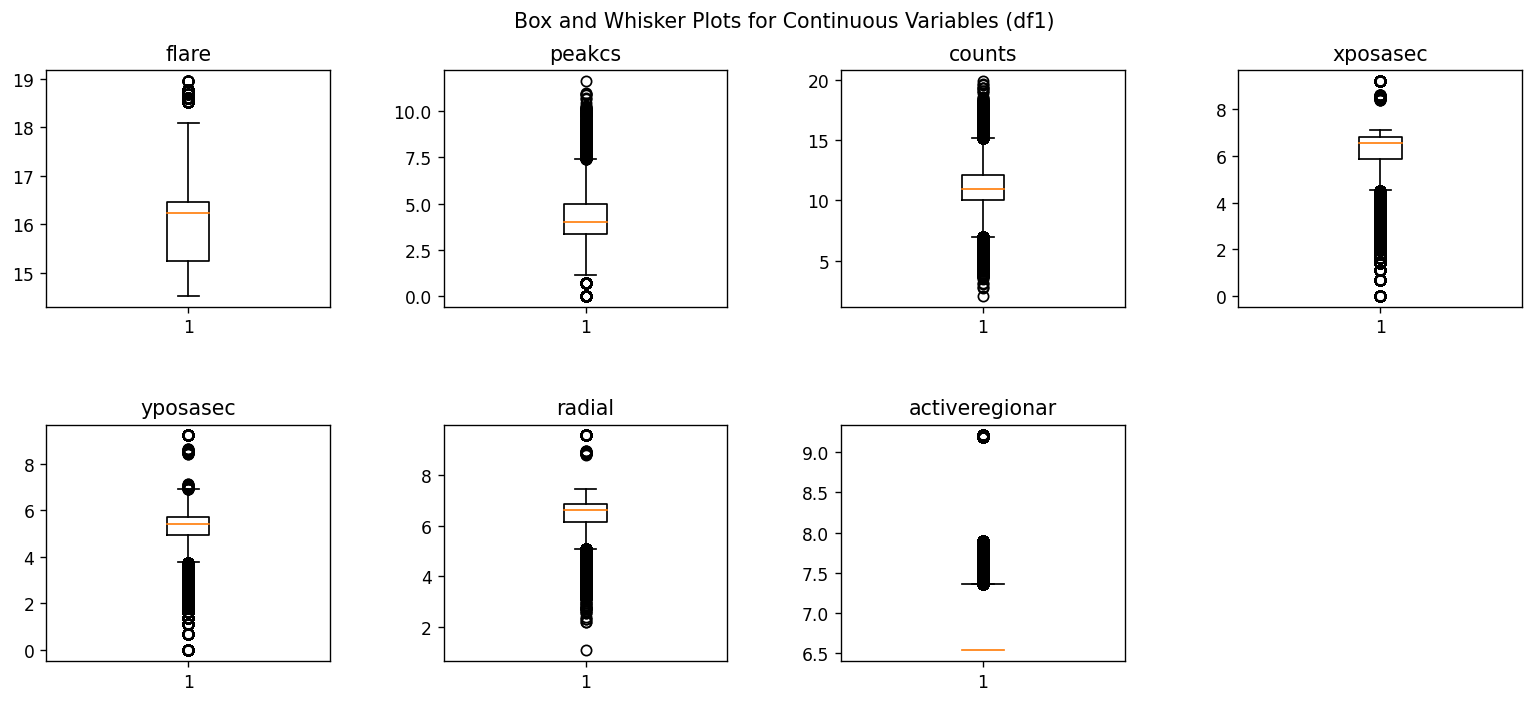

In [24]:
var=0
plt.figure(figsize=(15,6), dpi=123)
plt.suptitle("Box and Whisker Plots for Continuous Variables (df1)")
for c in range(len(cont_col1)): #considering continuous variables
  #first, perform log transform so box plots don't look too squished
  c_log = [] #defining new list to store transformed column
  if (df1[str(cont_col1[c])].dtypes == 'int64') | (df1[str(cont_col1[c])].dtypes == 'float64'): #to skip string data
    var+=1
    c_log = np.log(abs(df1[str(cont_col1[c])])) #log transformation of the column
    plt.subplot(2, 4, var)
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.5)
    plt.boxplot(c_log) #plotting the box plot
    plt.title(str(cont_col1[c]))
  else:
    continue
#plt.savefig(f"{images_dir}/box_whisker.png")
plt.show() #displaying the box plot

Scatter plot of x and y positions of each flare.

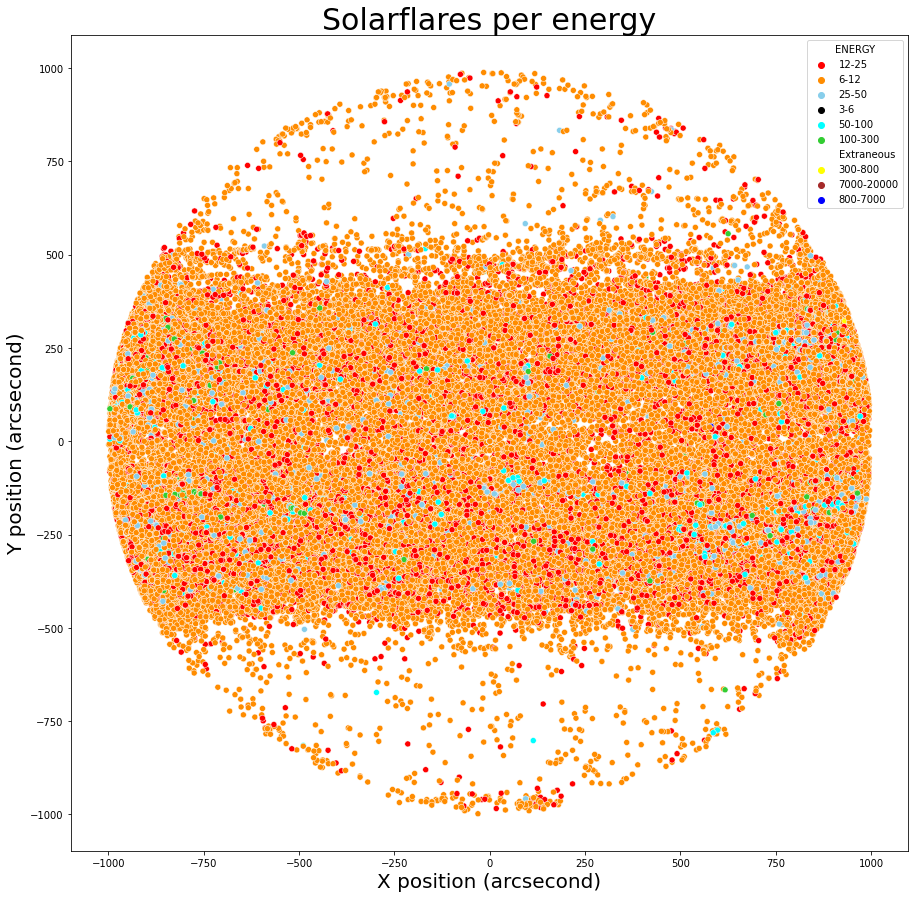

In [25]:
xpos = np.array(df1['xposasec'])
ypos = np.array(df1['yposasec'])
r = xpos**2+ypos**2 
ener = np.array(df1['energykev'])
#removing values beyond which lie beyond 1000 arcseconds from center of sun
for i in range(len(xpos)):
  if r[i] > 1000000:
    xpos[i]=0
    ypos[i]=0
    ener[i]='Extraneous'
data = {'ENERGY': ener,'xpos': xpos , 'ypos': ypos}
daf1 = pd.DataFrame(data)
fig, ax = plt.subplots(figsize=(15,15))
colors = {'3-6':'Black', '6-12':'Darkorange', '12-25':'Red', '25-50':'SkyBlue', '50-100':'Cyan' , '100-300':'LimeGreen' , '300-800':'Yellow' , '800-7000':'blue' , '7000-20000':'Brown', 'Extraneous':'#FF000000'}
sns.scatterplot(data = daf1, x='xpos', y='ypos', hue='ENERGY', palette = colors, ax=ax)
plt.title('Solarflares per energy',fontsize=30)
plt.xlabel('X position (arcsecond)',fontsize=20)
plt.ylabel('Y position (arcsecond)',fontsize=20)
#plt.savefig(f"{images_dir}/FLARE_SCATTER.png")
plt.show()

### **Machine Learning**

Plotting a histogram for both datasets and converting the histogram to a line chart which will be used for all further learning models.

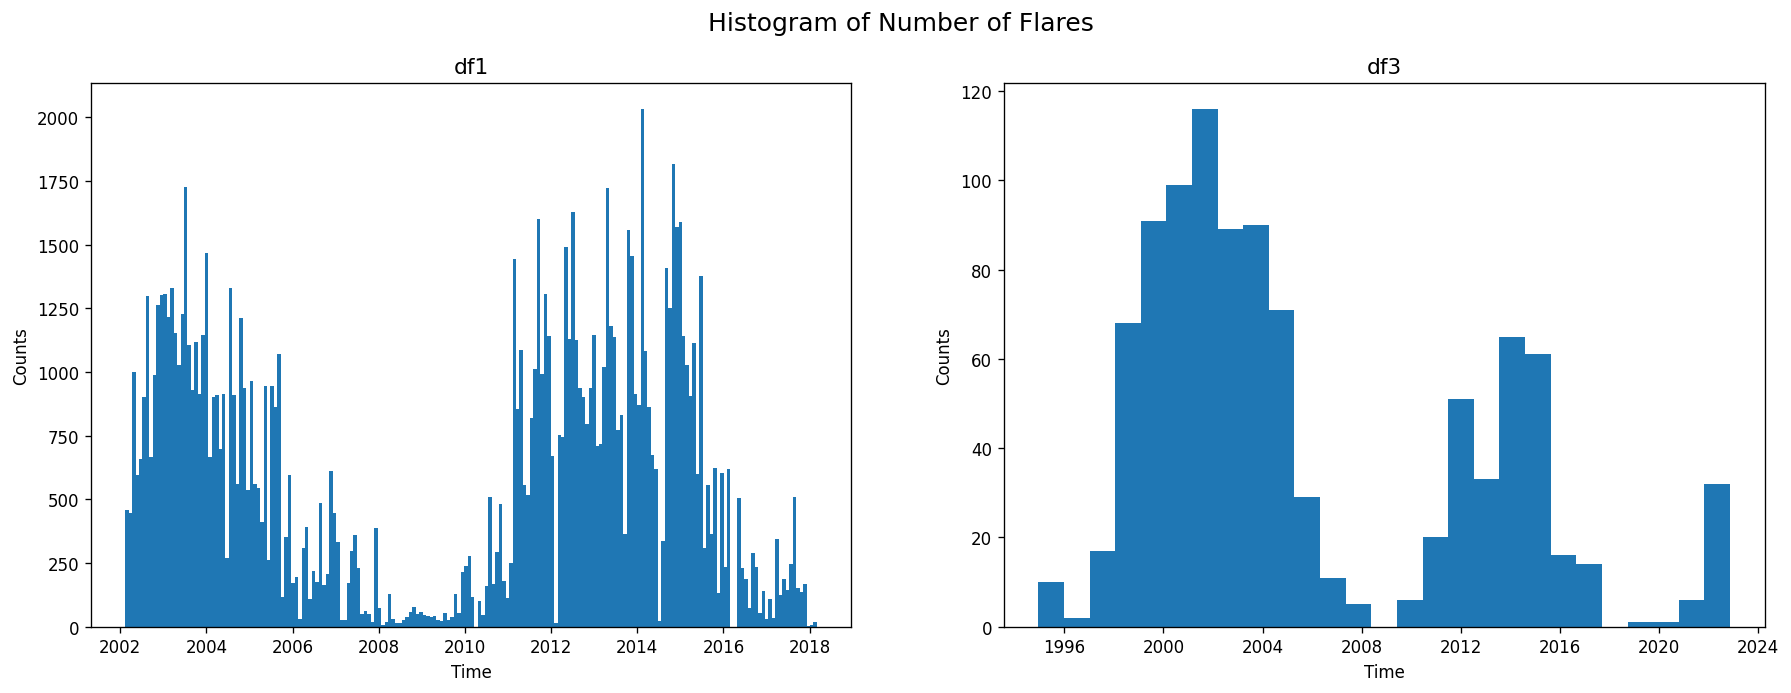

In [26]:
plt.figure(figsize=(18,6), dpi=120)
plt.suptitle("Histogram of Number of Flares", fontsize=15)

plt.subplot(1,2,1)
plt.hist(df1['date'], bins=200)
plt.title("df1", fontsize=13)
plt.xlabel("Time")
plt.ylabel("Counts")

plt.subplot(1,2,2)
plt.hist(df3['TriggerDate'], bins=27) 
plt.title("df3", fontsize=13)
plt.xlabel("Time")
plt.ylabel("Counts")

#plt.savefig(f"{images_dir}/hist_num_flares.png")
plt.show()

Now we will convert this histogram to 2 lists that contain date range and counts respectively.

In [27]:
dates1 = []
count1 = []
freq1 = []
for j in range(2002, 2019):
  for i in df1['date']:
    if i.year == j and i.day<15: #splitting a month into halves and counting flares in each half
      count1.append(str(j)+str(i.month)+'a')
    elif i.year == j and i.day>=15:
      count1.append(str(j)+str(i.month)+'b')
  for k in range(1,13):
    dates1.append(date(j, k, 7))
    dates1.append(date(j, k, 22))
    freq1.append(count1.count(str(j)+str(k)+'a'))
    freq1.append(count1.count(str(j)+str(k)+'b'))

In [28]:
dates3 = []
count3 = []
freq3 = []
for j in range(1994, 2023):
  for i in df3['TriggerDate']:   #splitting a year into quarters and counting flares in each quarter
    if i.year == j and i.month in range(1,4):
      count3.append(10*j+1)
    elif i.year == j and i.month in range(4,7):
      count3.append(10*j+2)
    elif i.year == j and i.month in range(7,10):
      count3.append(10*j+3)  
    elif i.year == j and i.month in range(10,13):
      count3.append(10*j+4)
  dates3.append(date(j, 2, 1))
  dates3.append(date(j, 5, 1))
  dates3.append(date(j, 8, 1))
  dates3.append(date(j, 11, 1))
  freq3.append(count3.count(10*j+1))
  freq3.append(count3.count(10*j+2))
  freq3.append(count3.count(10*j+3))
  freq3.append(count3.count(10*j+4))

Plotting the newly created lists.

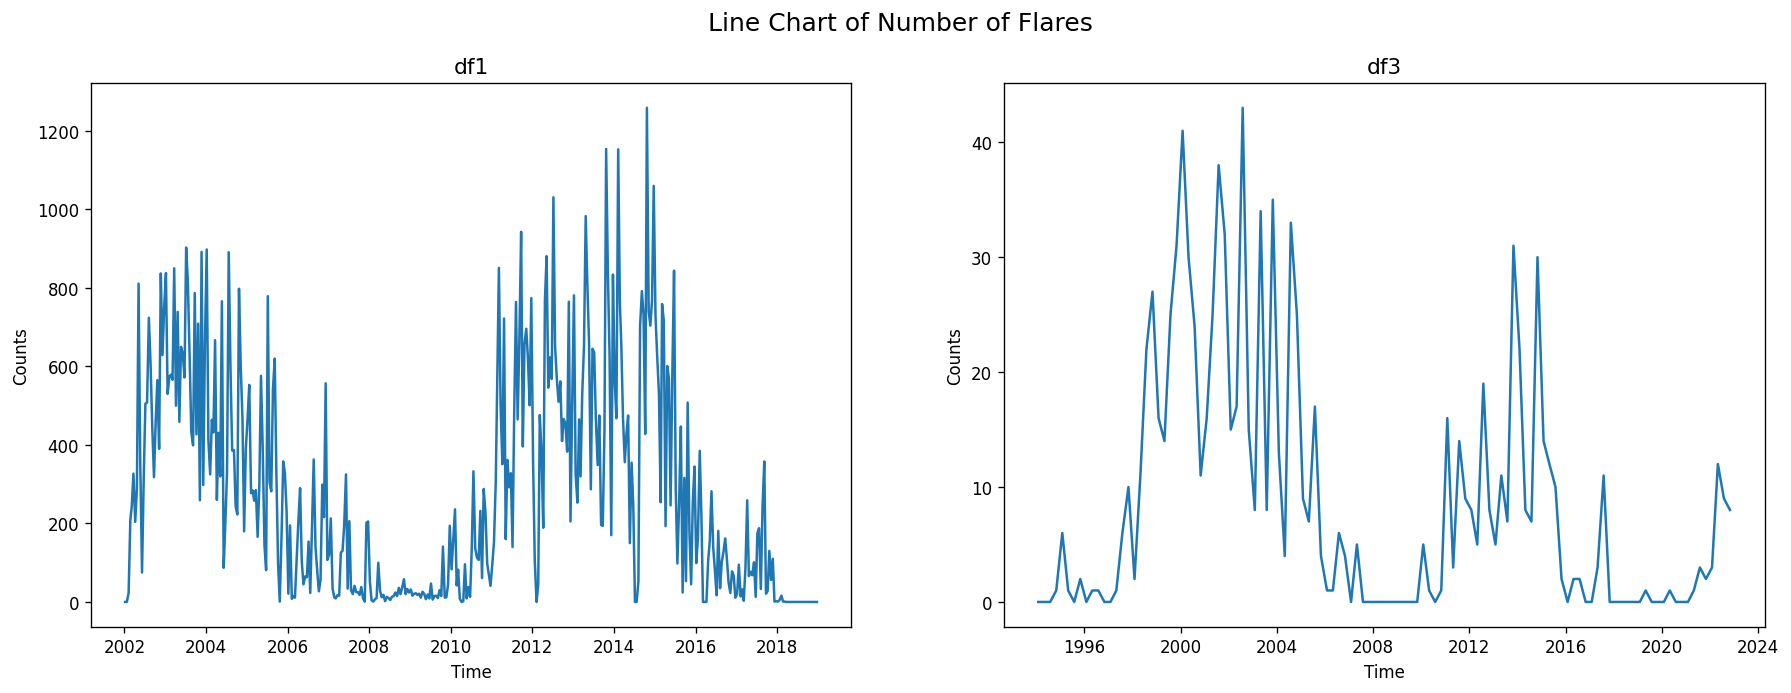

In [29]:
plt.figure(figsize=(18,6), dpi=120)
plt.suptitle("Line Chart of Number of Flares", fontsize=15)

plt.subplot(1,2,1)
plt.plot(dates1, freq1)
plt.title("df1", fontsize=13)
plt.xlabel("Time")
plt.ylabel("Counts")

plt.subplot(1,2,2)
plt.plot(dates3, freq3)
plt.title("df3", fontsize=13)
plt.xlabel("Time")
plt.ylabel("Counts")

#plt.savefig(f"{images_dir}/line_num_flares.png")
plt.show()

Creating dataframes from the lists

In [30]:
#for df1
data1 = pd.DataFrame(index=range(0,len(dates1)),columns=['Date','Count'])
for i in range(0,len(data1)):
    data1["Date"][i]=dates1[i]
    data1["Count"][i]=freq1[i]
data1.index=data1.Date
data1.drop('Date' ,axis=1, inplace=True)
#for df2
data3 = pd.DataFrame(index=range(0,len(dates3)),columns=['Date','Count'])
for i in range(0,len(data3)):
    data3["Date"][i]=dates3[i]
    data3["Count"][i]=freq3[i]
data3.index=data3.Date
data3.drop('Date' ,axis=1, inplace=True)

In [31]:
data1

,Count
Date,
2002-01-07,0
2002-01-22,0
2002-02-07,23
2002-02-22,208
2002-03-07,244
...,...
2018-10-22,0
2018-11-07,0
2018-11-22,0


In [32]:
data3

,Count
Date,
1994-02-01,0
1994-05-01,0
1994-08-01,0
1994-11-01,1
1995-02-01,6
...,...
2021-11-01,2
2022-02-01,3
2022-05-01,12


Starting on the first model (Long Short-Term Memory)

In [33]:
#for df1
scaler1 = MinMaxScaler(feature_range=(0,1))          #scaling the data
final_data1 = data1.values
train_data1 = final_data1[0:320,:]                   #choosing train data
valid_data1 = final_data1[320:,:]                    #choosing test data
scaled_data1 = scaler1.fit_transform(final_data1)   #transforming the data
x_train_data1, y_train_data1 = [],[]
for i in range(88,len(train_data1)):
    x_train_data1.append(scaled_data1[i-88:i,0])
    y_train_data1.append(scaled_data1[i,0])
x_train_data1 = np.array(x_train_data1)
y_train_data1 = np.array(y_train_data1)

In [34]:
#begin training the model
lstm_model1 = Sequential()
lstm_model1.add(LSTM(units=50,return_sequences=True,input_shape=(np.shape(x_train_data1)[1],1)))
lstm_model1.add(LSTM(units=50))
lstm_model1.add(Dense(1))
model_data1 = data1[len(data1)-190:].values
model_data1 = model_data1.reshape(-1,1)
model_data1 = scaler1.transform(model_data1)
lstm_model1.compile(loss = 'mean_squared_error', optimizer='adam')
lstm_model1.fit(x_train_data1, y_train_data1 ,epochs=10, batch_size=64, verbose=2)

Epoch 1/10
4/4 - 4s - loss: 0.0774 - 4s/epoch - 1s/step
Epoch 2/10
4/4 - 0s - loss: 0.0369 - 398ms/epoch - 100ms/step
Epoch 3/10
4/4 - 0s - loss: 0.0394 - 423ms/epoch - 106ms/step
Epoch 4/10
4/4 - 0s - loss: 0.0328 - 415ms/epoch - 104ms/step
Epoch 5/10
4/4 - 0s - loss: 0.0324 - 406ms/epoch - 101ms/step
Epoch 6/10
4/4 - 0s - loss: 0.0310 - 380ms/epoch - 95ms/step
Epoch 7/10
4/4 - 0s - loss: 0.0293 - 348ms/epoch - 87ms/step
Epoch 8/10
4/4 - 0s - loss: 0.0294 - 359ms/epoch - 90ms/step
Epoch 9/10
4/4 - 0s - loss: 0.0289 - 381ms/epoch - 95ms/step
Epoch 10/10
4/4 - 0s - loss: 0.0286 - 414ms/epoch - 104ms/step


In [35]:
#for df3
scaler3 = MinMaxScaler(feature_range=(0,1))          #scaling the data
train_data3 = data3[0:90].values                     #choosing train data
valid_data3 = data3[90:].values                      #choosing test data
scaled_data3 = scaler3.fit_transform(data3.values)   #transforming the data
x_train_data3, y_train_data3 = [],[]
for i in range(33,len(train_data3)):
    x_train_data3.append(scaled_data3[i-33:i,0])
    y_train_data3.append(scaled_data3[i,0])
x_train_data3 = np.array(x_train_data3)
y_train_data3 = np.array(y_train_data3)

In [45]:
#begin training the model
lstm_model3 = Sequential()
lstm_model3.add(LSTM(units=50,return_sequences=True,input_shape=(np.shape(x_train_data3)[1],1)))
lstm_model3.add(LSTM(units=50))
lstm_model3.add(Dense(1))
model_data3 = data3[len(data3)-59:].values
model_data3 = model_data3.reshape(-1,1)
model_data3 = scaler3.transform(model_data3)
lstm_model3.compile(loss = 'mean_squared_error', optimizer='adam')
lstm_model3.fit(x_train_data3, y_train_data3 ,epochs=10, batch_size=64, verbose=2)

Epoch 1/10
1/1 - 4s - loss: 0.1298 - 4s/epoch - 4s/step
Epoch 2/10
1/1 - 0s - loss: 0.1057 - 48ms/epoch - 48ms/step
Epoch 3/10
1/1 - 0s - loss: 0.0876 - 38ms/epoch - 38ms/step
Epoch 4/10
1/1 - 0s - loss: 0.0739 - 39ms/epoch - 39ms/step
Epoch 5/10
1/1 - 0s - loss: 0.0637 - 44ms/epoch - 44ms/step
Epoch 6/10
1/1 - 0s - loss: 0.0568 - 49ms/epoch - 49ms/step
Epoch 7/10
1/1 - 0s - loss: 0.0534 - 40ms/epoch - 40ms/step
Epoch 8/10
1/1 - 0s - loss: 0.0534 - 39ms/epoch - 39ms/step
Epoch 9/10
1/1 - 0s - loss: 0.0552 - 41ms/epoch - 41ms/step
Epoch 10/10
1/1 - 0s - loss: 0.0562 - 40ms/epoch - 40ms/step


Applying the model and checking loss.

In [37]:
X_test1=[]
for i in range(88,model_data1.shape[0]):
  X_test1.append(model_data1[i-88:i,0])
X_test1 = np.array(X_test1)
X_test1 = np.reshape(X_test1,(X_test1.shape[0],X_test1.shape[1],1))
predicted1 = lstm_model1.predict(X_test1)
predicted1 = scaler1.inverse_transform(predicted1)                       #inverse transform to make it useable
train_data_plot1 = data1[0:306]
valid_data_plot1 = data1[306:]
valid_data_plot1['Predictions'] = predicted1
#calculating a modified version of RMSE where we take scaled values of predicted and actual data
rmselstm1 = np.mean(((valid_data_plot1['Predictions']-valid_data_plot1['Count'])/np.max(data1[:].values))**2)
print("Modified Mean Squared Error: %.3f" % rmselstm1)

4/4 [==============================] - 1s 18ms/step
Modified Mean Squared Error: 0.021


In [46]:
X_test3=[]
for i in range(33,model_data3.shape[0]):
  X_test3.append(model_data3[i-33:i,0])
X_test3 = np.array(X_test3)
X_test3 = np.reshape(X_test3,(X_test3.shape[0],X_test3.shape[1],1))
predicted3 = lstm_model3.predict(X_test3)
predicted3 = scaler3.inverse_transform(predicted3)                    #inverse transform to make it useable
train_data_plot3 = data3[0:91]
valid_data_plot3 = data3[90:]
valid_data_plot3['Predictions'] = predicted3
#calculating a modified version of RMSE where we take scaled values of predicted and actual data
rmselstm3 = np.mean(((valid_data_plot3['Predictions']-valid_data_plot3['Count'])/np.max(data3[:].values))**2)
print("Modified Mean Squared Error: %.3f" % rmselstm3)

1/1 [==============================] - 1s 866ms/step
Modified Mean Squared Error: 0.026


Plotting the results

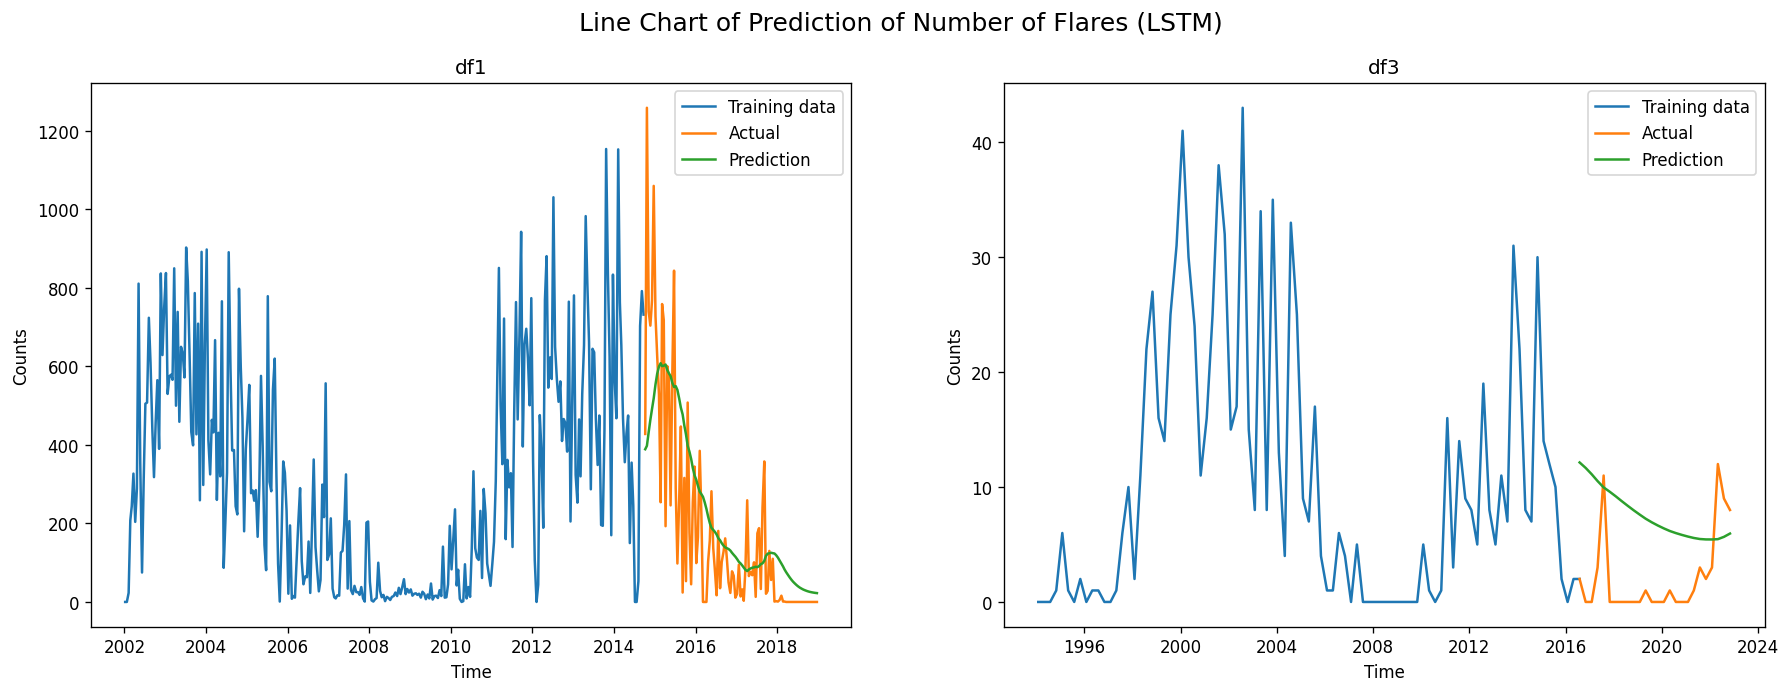

In [47]:
plt.figure(figsize=(18,6), dpi=120)
plt.suptitle("Line Chart of Prediction of Number of Flares (LSTM)", fontsize=15)

plt.subplot(1,2,1)
plt.plot(train_data_plot1["Count"])
plt.plot(valid_data_plot1[['Count',"Predictions"]])
plt.title("df1")
plt.xlabel("Time")
plt.ylabel("Counts")
plt.legend(['Training data', 'Actual', 'Prediction'])

plt.subplot(1,2,2)
plt.plot(train_data_plot3["Count"])
plt.plot(valid_data_plot3[['Count',"Predictions"]])
plt.title("df3")
plt.xlabel("Time")
plt.ylabel("Counts")
plt.legend(['Training data', 'Actual', 'Prediction'])

#plt.savefig(f"{images_dir}/LSTM_result.png")
plt.show()

We can see from the graph and the modified RMSE that dataset df1 gives better results due to larger number of data points.

Second model (Autoregression)

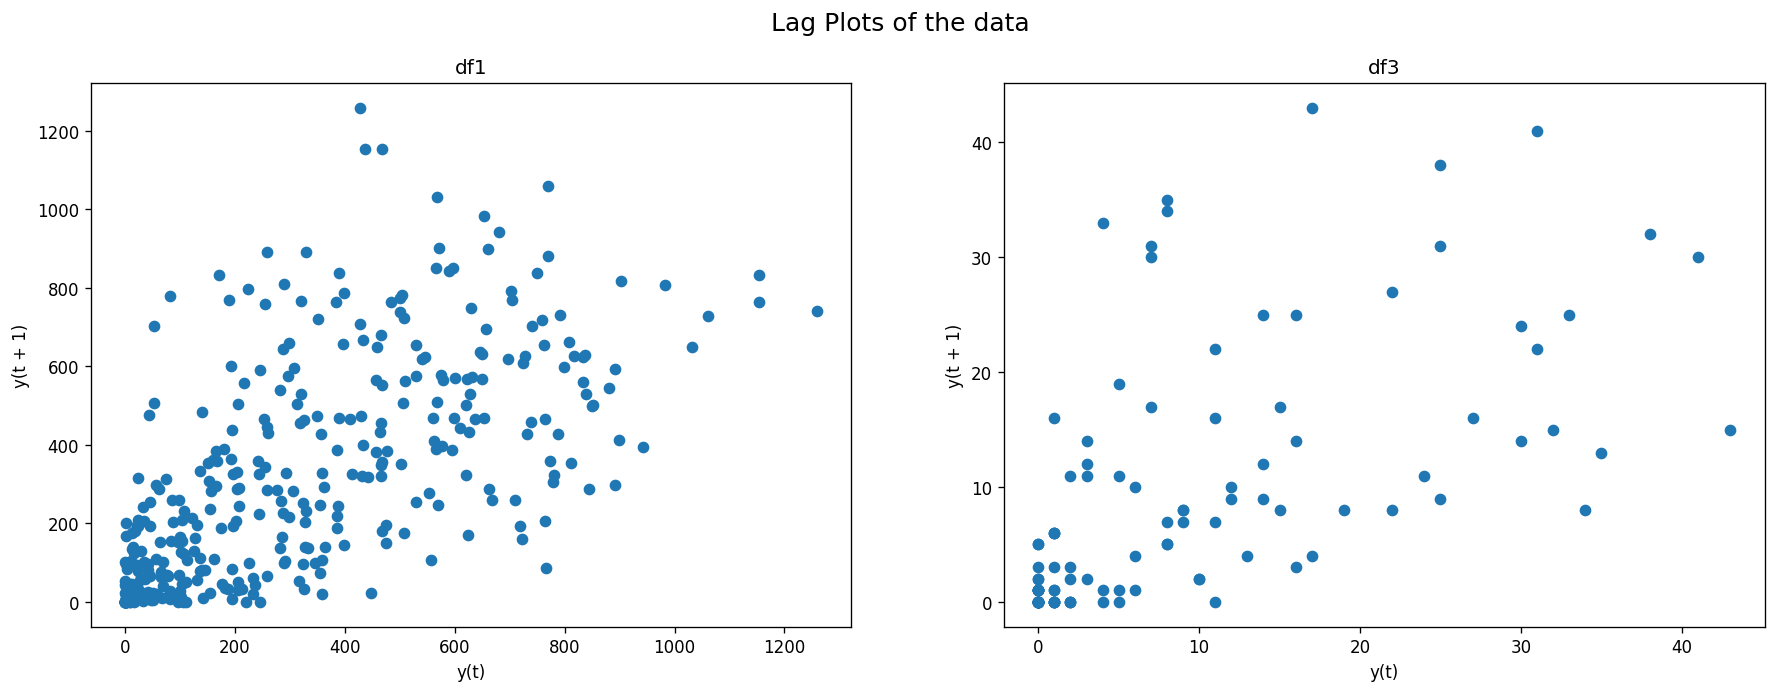

In [40]:
#lag plots
plt.figure(figsize=(18,6), dpi=120)
plt.suptitle("Lag Plots of the data", fontsize=15)

plt.subplot(1,2,1)
pd.plotting.lag_plot(data1)
plt.title("df1")

plt.subplot(1,2,2)
pd.plotting.lag_plot(data3)
plt.title("df3")

#plt.savefig(f"{images_dir}/lag_plot.png")
plt.show()

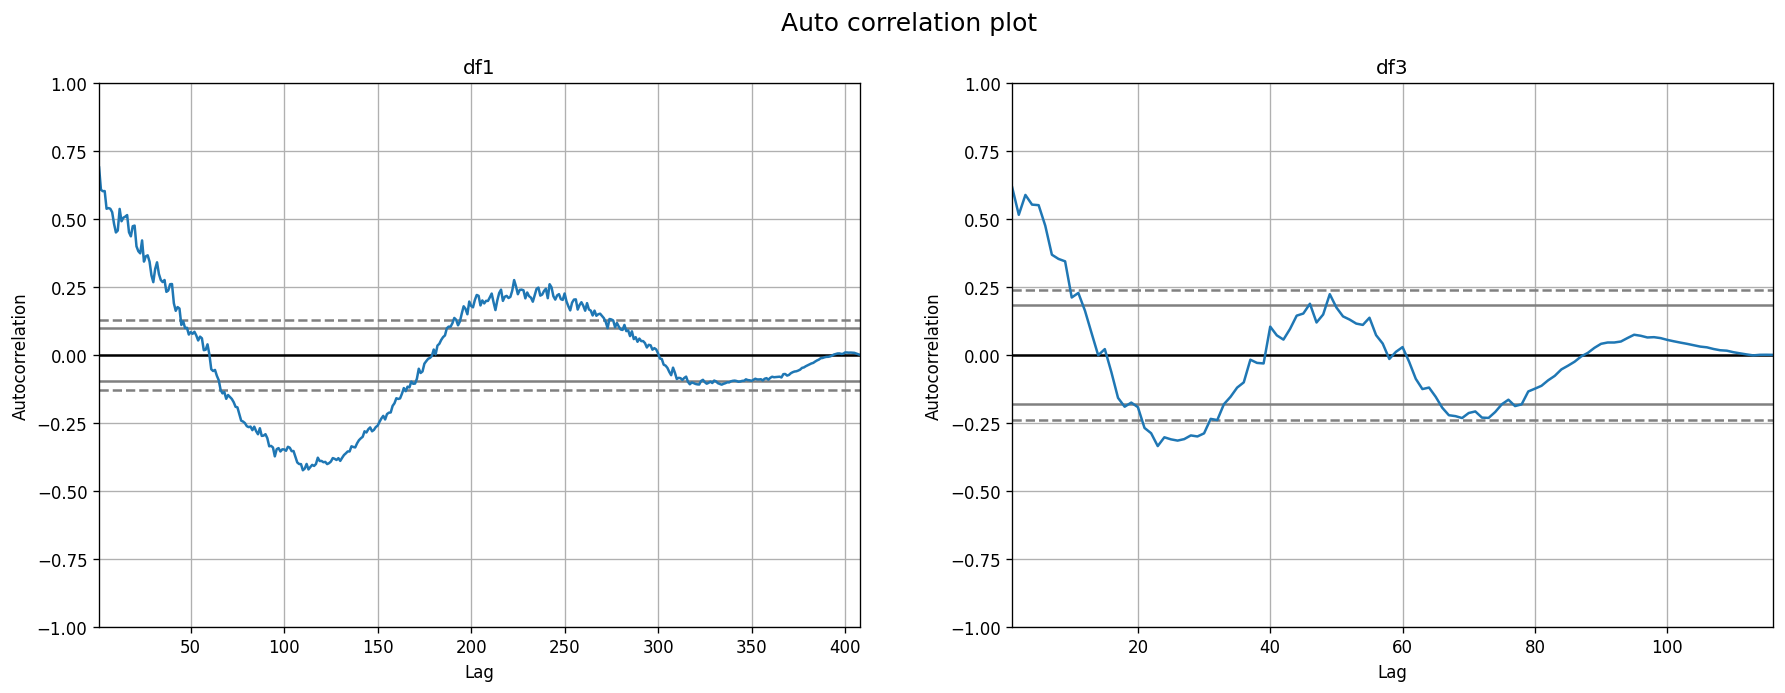

In [41]:
#auto correlation plots
plt.figure(figsize=(18,6), dpi=120)
plt.suptitle("Auto correlation plot", fontsize=15)

plt.subplot(1,2,1)
pd.plotting.autocorrelation_plot(data1)
plt.title("df1")

plt.subplot(1,2,2)
pd.plotting.autocorrelation_plot(data3)
plt.title("df3")

#plt.savefig(f"{images_dir}/auto_corr_plot.png")
plt.show()

Training the Autoregression model on both datasets and comparing modified RMSE

In [42]:
#for df1
X1 = data1.values
train1, test1 = X1[:len(X1)-100], X1[len(X1)-100:]
#training the autoregression model for df1
window1 = 5
model1 = AutoReg(train1, lags=7)
model_fit1 = model1.fit()
coef1 = model_fit1.params
#walk forward over time steps in test
history1 = train1[len(train1)-window1:]
history1 = [history1[i] for i in range(len(history1))]
predictions1 = list()
for t in range(len(test1)):
	length = len(history1)
	lag = [history1[i] for i in range(length-window1,length)]
	yhat = coef1[0]
	for d in range(window1):
		yhat += coef1[d+1] * lag[window1-d-1]
	obs = test1[t]
	predictions1.append(yhat)
	history1.append(obs)
#calculating a modified version of RMSE where we take scaled values of predicted and actual data
rmsear1 = np.mean(((test1-predictions1)/np.max(data1[:].values))**2)
print("Modified Mean Squared Error: %.3f" % rmsear1)

Modified Mean Squared Error: 0.012


In [43]:
#for df3
X3 = data3.values
train3, test3 = X3[:len(X3)-30], X3[len(X3)-30:]
#training the autoregression model for df1
window3 = 5
model3 = AutoReg(train3, lags=7)
model_fit3 = model3.fit()
coef3 = model_fit3.params
#walk forward over time steps in test
history3 = train3[len(train3)-window1:]
history3 = [history3[i] for i in range(len(history3))]
predictions3 = list()
for t in range(len(test3)):
	length = len(history3)
	lag = [history3[i] for i in range(length-window3,length)]
	yhat = coef3[0]
	for d in range(window3):
		yhat += coef3[d+1] * lag[window3-d-1]
	obs = test3[t]
	predictions3.append(yhat)
	history3.append(obs)
#calculating a modified version of RMSE where we take scaled values of predicted and actual data
rmsear3 = np.mean(((test3-predictions3)/np.max(data3[:].values))**2)
print("Modified Mean Squared Error: %.3f" % rmsear3)

Modified Mean Squared Error: 0.017


Plotting the results

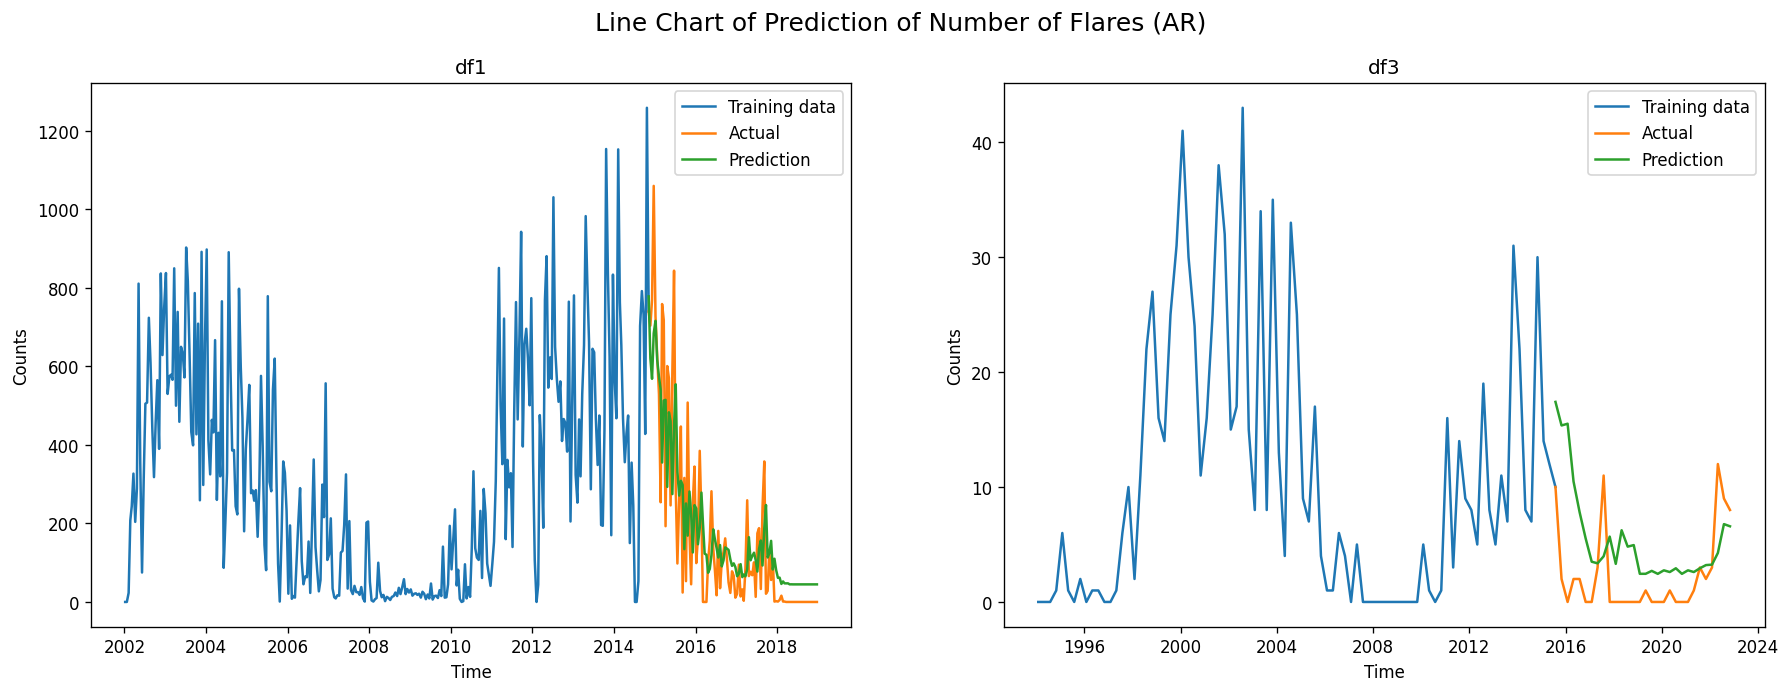

In [44]:
plt.figure(figsize=(18,6), dpi=120)
plt.suptitle("Line Chart of Prediction of Number of Flares (AR)", fontsize=15)

plt.subplot(1,2,1)
train_data_plotar1=data1[0:309]
valid_data_plotar1=data1[308:]
valid_data_plotar1['Predictions'] = predictions1
plt.plot(train_data_plotar1["Count"])
plt.plot(valid_data_plotar1[['Count',"Predictions"]])
plt.title("df1")
plt.xlabel("Time")
plt.ylabel("Counts")
plt.legend(['Training data', 'Actual', 'Prediction'])

plt.subplot(1,2,2)
train_data_plotar3=data3[0:87]
valid_data_plotar3=data3[86:]
valid_data_plotar3['Predictions'] = predictions3
plt.plot(train_data_plotar3["Count"])
plt.plot(valid_data_plotar3[['Count',"Predictions"]])
plt.title("df3")
plt.xlabel("Time")
plt.ylabel("Counts")
plt.legend(['Training data', 'Actual', 'Prediction'])

#plt.savefig(f"{images_dir}/AR_result.png")
plt.show()

From the plots and the Modified Mean Square Error, we can see that df1 gives a better prediction that df3.

### **Conclusion**

**LSTM:**

*df1* gives a modified mean squared error of $0.021$ whereas *df3* gives an error of $0.026$ indicating that *df1* is the better dataset to choose.

**Autoregression:**

*df1* gives a modified mean squared error of $0.012$ whereas *df3* gives an error of $0.017$ indicating that *df1* is the better dataset to choose.

*df1* also has a higher correlation than *df3* as seen on the Auto Correlation graph.

**df1:**

Produces an error of $0.021$ with *LSTM* whereas an error of $0.012$ with *Autoregression* indicating that *Autoregression* is the better model to choose

**df3:**

Produces an error of $0.026$ with *LSTM* whereas an error of $0.017$ with *Autoregression* indicating that *Autoregression* is the better model to choose

##References
1. Stack Overflow
2. Geeks for Geeks
3. Slides shared by the professor
4. https://towardsdatascience.com/
5. https://www.w3schools.com/
6. https://www.kaggle.com/code/jmquintana/solar-flares-from-rhessi-mission
7. https://towardsdatascience.com/step-by-step-guide-building-a-prediction-model-in-python-ac441e8b9e8b
8. http://www.ioffe.ru/LEA/kwsun/
9. https://www.sciencebuddies.org/science-fair-projects/project-ideas/Astro_p021/astronomy/correlation-of-coronal-mass-ejections-with-solar-sunspot-cycle#materials
10. https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/